In [1]:
%matplotlib inline

In [2]:
from mocpy import MOC
import astropy.units as u
from astropy.coordinates import SkyCoord

First, we retrieve the MOC for VizieR table VIII/84/7c

In [3]:
moc = MOC.from_vizier_table("VIII/84/7c", nside=64)

In [4]:
def plot(moc, title=None):
    import matplotlib.pyplot as plt
    from mocpy import WCS
    from astropy.coordinates import Angle

    fig = plt.figure(111, figsize=(15, 15))

    with WCS(
        fig,
        fov=330 * u.deg,
        center=SkyCoord(0, 0, unit="deg", frame="icrs"),
        coordsys="icrs",
        rotation=Angle(0, u.degree),
        projection="AIT",
    ) as wcs:
        ax = fig.add_subplot(1, 1, 1, projection=wcs)

        moc.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")

    plt.xlabel("ra")
    plt.ylabel("dec")
    if title:
        plt.title(title)
    plt.grid(color="black", linestyle="dotted")

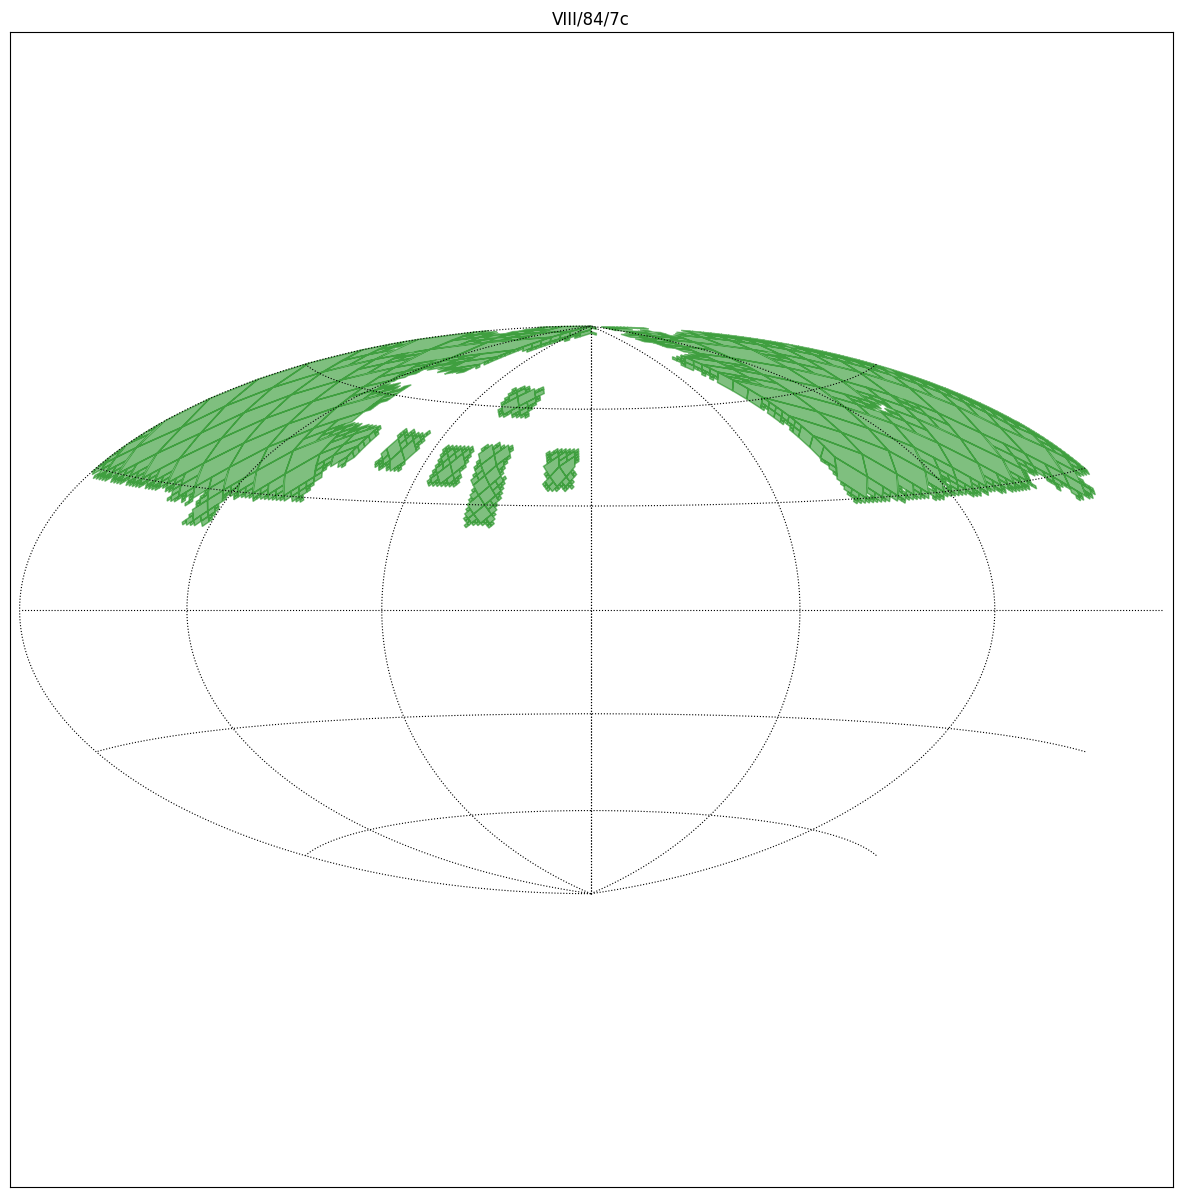

In [5]:
plot(moc=moc, title="VIII/84/7c")

Then, we query Hipparcos catalogue to get all sources in the MOC coverage

In [6]:
# table = moc.query_simbad(10000)
table = moc.query_vizier_table("I/239/hip_main", max_rows=100000)
print(table)

   _RAJ2000       _DEJ2000    recno   HIP   ... Notes   _RA.icrs     _DE.icrs  
     deg            deg                     ...           deg          deg     
-------------- -------------- ------ ------ ... ----- ------------ ------------
  1.5468688953  87.8894244013    513    513 ...         1.54686890  87.88942440
  4.0222774349  88.4011934198   1284   1284 ...         4.02227743  88.40119342
  4.4701298766  44.5779461534   1433   1434 ...         4.47012988  44.57794615
  4.5823503880  44.5584124080   1473   1474 ...         4.58235039  44.55841241
  4.5953557332  44.0229534917   1474   1475 ...         4.59535573  44.02295349
  4.6695923454  44.6299885536   1495   1496 ...         4.66959235  44.62998855
  4.6757036057  43.7911411989   1500   1501 ...         4.67570361  43.79114120
  4.9750713825  44.7094160244   1591   1593 ...         4.97507138  44.70941602
  5.1325470462  43.6942792303   1639   1641 ...         5.13254705  43.69427923
  5.1375081607  45.5089274590   1640   1

Finally, we plot the positions of the sources in the table to check if they lie in the MOC coverage

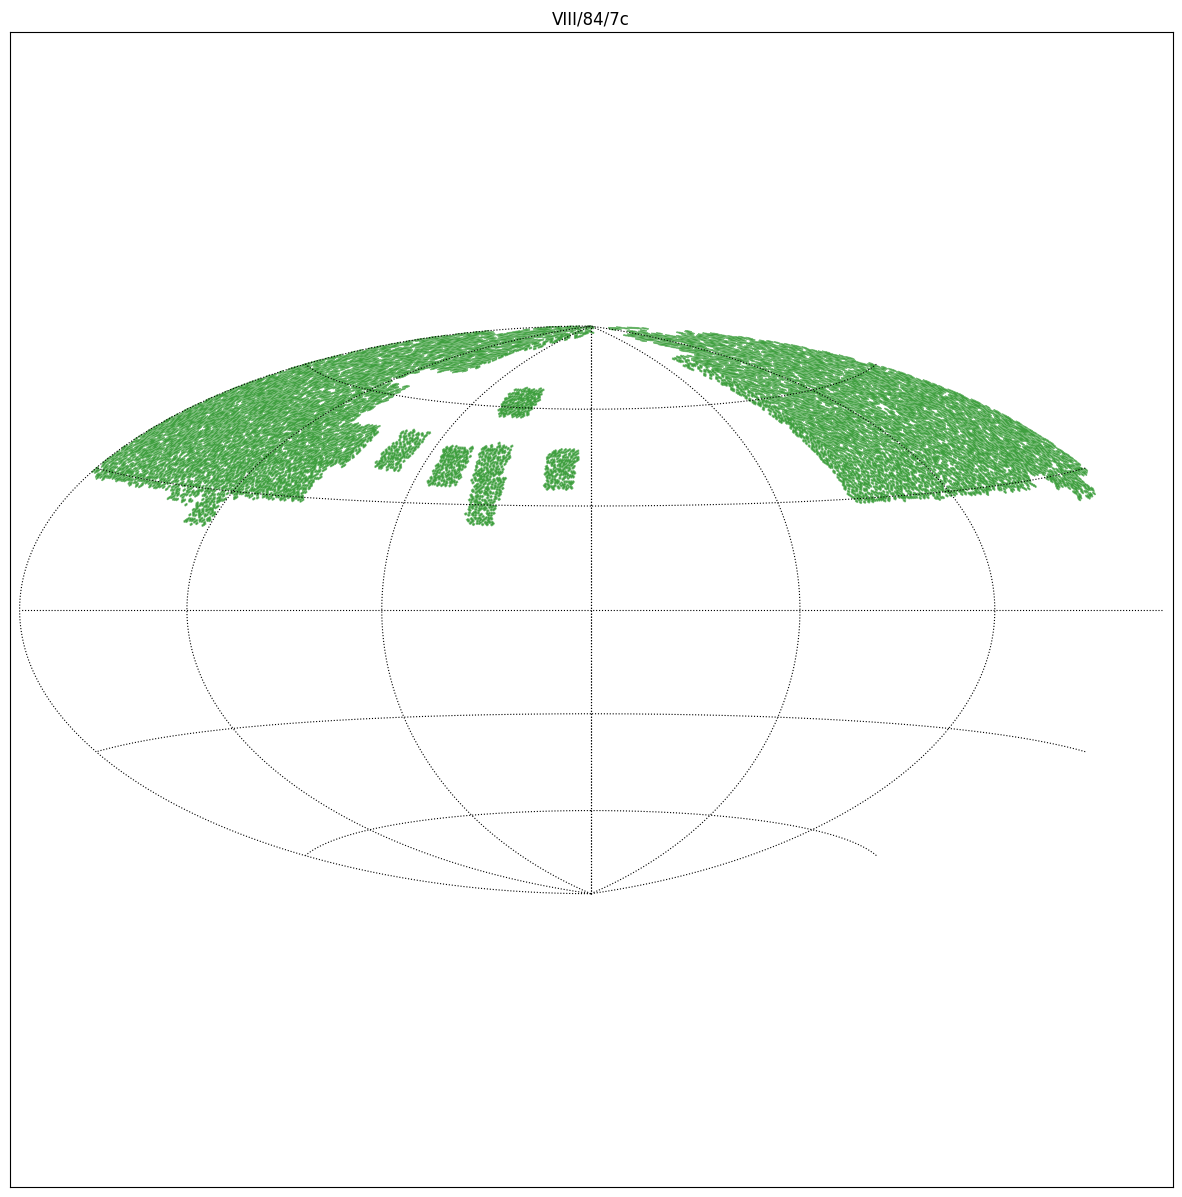

In [7]:
moc_table = MOC.from_lonlat(table["_RAJ2000"].T * u.deg, table["_DEJ2000"].T * u.deg, 7)
plot(moc=moc_table, title="VIII/84/7c")